# Data Bootcamp Final Project: Airbnb Listings

### Flora Li (fnl218), Sanemi Nair (skn8698), Jillian Robredo (jtr374), Yajas Shah (yps2004)

## Importing Data and Packages

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
df_raw = pd.read_csv('nyc_airbnb_listings.csv')
df_raw.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211102175544,2021-11-03,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211102175544,2021-11-03,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.81,4.72,4.65,NaN,f,1,1,0,0,4.91
2,5121,https://www.airbnb.com/rooms/5121,20211102175544,2021-11-03,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.53
3,5136,https://www.airbnb.com/rooms/5136,20211102175544,2021-11-03,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20211102175544,2021-11-03,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.41,4.87,4.35,NaN,f,1,0,1,0,3.70


## Initial Data Cleaning

In [98]:
df = df_raw[["id", "name", "host_id",'host_is_superhost','host_acceptance_rate','neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'room_type','price',
       'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [99]:
#rename columns and drop NaN
df.rename(columns={'neighbourhood_cleansed':'neighborhood', 'neighbourhood_group_cleansed':'borough'}, inplace=True)
df=df.dropna()

In [100]:
#change price column to float
df['price'] = df['price'].str.replace('\,', '')
df['price'] = df['price'].str.replace('$', '').astype(float)

In [101]:
#change host_acceptance_rate column to float
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str).str.strip().str.replace('%', '').astype(float)
df.head()

,id,name,host_id,host_is_superhost,host_acceptance_rate,neighborhood,borough,room_type,price,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2595,Skylit Midtown Castle,2845,f,18.0,Midtown,Manhattan,Entire home/apt,150.0,322,48,4.70,4.72,4.62,4.76,4.79,4.86,4.41
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,f,76.0,Bedford-Stuyvesant,Brooklyn,Entire home/apt,73.0,220,408,4.46,4.59,4.50,4.79,4.81,4.72,4.65
2,5121,BlissArtsSpace!,7356,f,100.0,Bedford-Stuyvesant,Brooklyn,Private room,60.0,365,50,4.52,4.22,4.09,4.91,4.91,4.47,4.52
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,f,25.0,Sunset Park,Brooklyn,Entire home/apt,275.0,91,2,5.00,5.00,5.00,5.00,5.00,4.50,5.00
4,5178,Large Furnished Room Near B'way,8967,f,100.0,Midtown,Manhattan,Private room,68.0,218,505,4.21,4.20,3.73,4.66,4.41,4.87,4.35


## New Columns for Analysis

In [102]:
#new column: average rating across different metrics and drop nan
df['avg_review'] = df[['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value']].mean(axis=1)
df = df.drop(columns=['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value'])
df.head()

,id,name,host_id,host_is_superhost,host_acceptance_rate,neighborhood,borough,room_type,price,availability_365,number_of_reviews,avg_review
0,2595,Skylit Midtown Castle,2845,f,18.0,Midtown,Manhattan,Entire home/apt,150.0,322,48,4.694286
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,f,76.0,Bedford-Stuyvesant,Brooklyn,Entire home/apt,73.0,220,408,4.645714
2,5121,BlissArtsSpace!,7356,f,100.0,Bedford-Stuyvesant,Brooklyn,Private room,60.0,365,50,4.520000
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,f,25.0,Sunset Park,Brooklyn,Entire home/apt,275.0,91,2,4.928571
4,5178,Large Furnished Room Near B'way,8967,f,100.0,Midtown,Manhattan,Private room,68.0,218,505,4.347143


In [103]:
#new column: quintile rank of avg_review for each listing
df['avg_review_quintile']= pd.qcut(df['avg_review'],5, labels = False, duplicates='raise')
df.head()

,id,name,host_id,host_is_superhost,host_acceptance_rate,neighborhood,borough,room_type,price,availability_365,number_of_reviews,avg_review,avg_review_quintile
0,2595,Skylit Midtown Castle,2845,f,18.0,Midtown,Manhattan,Entire home/apt,150.0,322,48,4.694286,1
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,f,76.0,Bedford-Stuyvesant,Brooklyn,Entire home/apt,73.0,220,408,4.645714,1
2,5121,BlissArtsSpace!,7356,f,100.0,Bedford-Stuyvesant,Brooklyn,Private room,60.0,365,50,4.520000,0
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,f,25.0,Sunset Park,Brooklyn,Entire home/apt,275.0,91,2,4.928571,3
4,5178,Large Furnished Room Near B'way,8967,f,100.0,Midtown,Manhattan,Private room,68.0,218,505,4.347143,0


In [104]:
#new column: avg_review^5 to highlight differences in ratings
df['exp_review2']= df['avg_review']**5
df.head()

,id,name,host_id,host_is_superhost,host_acceptance_rate,neighborhood,borough,room_type,price,availability_365,number_of_reviews,avg_review,avg_review_quintile,exp_review2
0,2595,Skylit Midtown Castle,2845,f,18.0,Midtown,Manhattan,Entire home/apt,150.0,322,48,4.694286,1,2279.541984
1,3831,"Whole flr w/private bdrm, bath & kitchen(pls r...",4869,f,76.0,Bedford-Stuyvesant,Brooklyn,Entire home/apt,73.0,220,408,4.645714,1,2164.026051
2,5121,BlissArtsSpace!,7356,f,100.0,Bedford-Stuyvesant,Brooklyn,Private room,60.0,365,50,4.520000,0,1886.653624
3,5136,"Spacious Brooklyn Duplex, Patio + Garden",7378,f,25.0,Sunset Park,Brooklyn,Entire home/apt,275.0,91,2,4.928571,3,2908.072806
4,5178,Large Furnished Room Near B'way,8967,f,100.0,Midtown,Manhattan,Private room,68.0,218,505,4.347143,0,1552.456935


## Data Exploration

**Note: for this section, we will use the median as our measure of the average to avoid any outliers impacting our analysis.**

### Boroughs

First, we are looking into the differences in various metrics between the five boroughs. The four variables we are curious about are the average review, number of reviews, price, and availability in the next year. These metrics will give us a general overview about the trends and differences between boroughs. For example, which borough has the most Airbnb availability? Does this demand coincide with higher prices? 

In [105]:
#group by borough
dfbyborough = df.groupby('borough').median()
dfbyborough

,id,host_id,host_acceptance_rate,price,availability_365,number_of_reviews,avg_review,avg_review_quintile,exp_review2
borough,,,,,,,,,
Bronx,37297049.0,133534397.0,93.0,73.0,215.0,17.0,4.835714,2.0,2644.253970
Brooklyn,30778070.5,36863640.5,90.0,114.0,145.0,17.0,4.845714,2.0,2671.708166
Manhattan,37122299.5,61391963.0,92.0,150.0,162.0,9.0,4.815000,2.0,2588.102980
Queens,36847076.0,137358866.0,92.0,79.5,174.0,15.0,4.824286,2.0,2613.154593
Staten Island,34851859.0,104812805.0,95.0,94.5,243.5,25.0,4.862143,2.0,2717.306755


(100.0, 255.675)

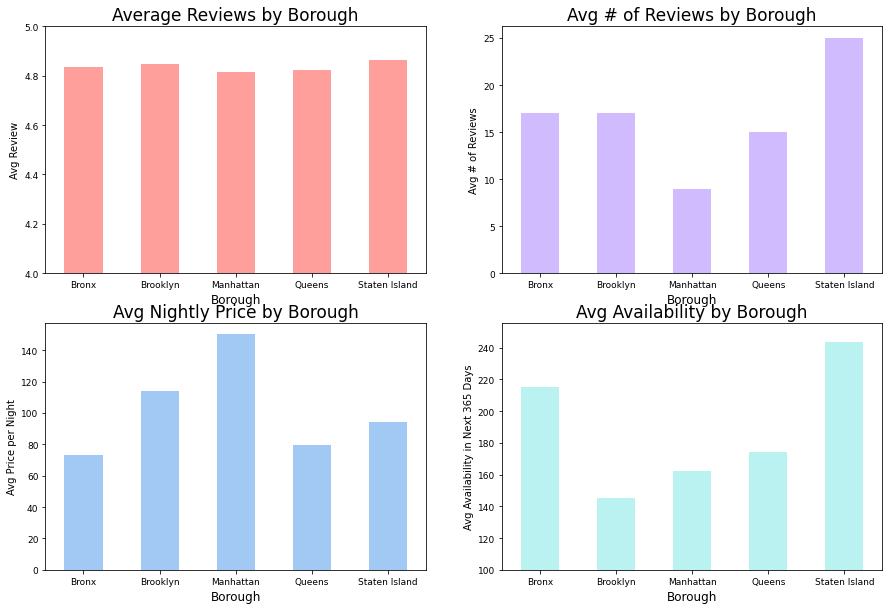

In [106]:
import seaborn as sns
sns.set_color_codes("pastel")
fig,axs = plt.subplots(2, 2)
dfbyborough['avg_review'].plot.bar(ax=axs[0,0], linewidth=4, figsize = (15,10), color='r')
dfbyborough['number_of_reviews'].plot.bar(ax=axs[0,1], linewidth=4, color='m')
dfbyborough['price'].plot.bar(ax=axs[1,0], linewidth=4, color='b')
dfbyborough['availability_365'].plot.bar(ax=axs[1,1], linewidth=4, color='c')

#set plot titles
axs[0,0].set_title('Average Reviews by Borough', size=17)
axs[0,1].set_title('Avg # of Reviews by Borough', size=17)
axs[1,0].set_title('Avg Nightly Price by Borough', size=17)               
axs[1,1].set_title('Avg Availability by Borough', size=17)

#set x-axs labels
axs[0,0].set_xlabel('Borough',size=12)
axs[0,1].set_xlabel('Borough',size=12)
axs[1,0].set_xlabel('Borough',size=12)
axs[1,1].set_xlabel('Borough',size=12)

#set y-axis labels
axs[0,0].set_ylabel('Avg Review',size=10)
axs[0,1].set_ylabel('Avg # of Reviews',size=10)
axs[1,0].set_ylabel('Avg Price per Night',size=10)
axs[1,1].set_ylabel('Avg Availability in Next 365 Days',size=10)

#rotate and resize tick labels for readability
axs[0,0].tick_params(labelrotation=0, labelsize=9)
axs[0,1].tick_params(labelrotation=0, labelsize=9)
axs[1,0].tick_params(labelrotation=0, labelsize=9)
axs[1,1].tick_params(labelrotation=0, labelsize=9)

#resize y-axes for better understanding of spread
axs[0,0].set_ylim(4,5)
axs[0,1].set_ylim(0)
axs[1,1].set_ylim(100)

Based on the above charts, we see that listings in Manhattan have the highest prices, followed by Brooklyn. Average reviews appear to stay around 4.8, but Manhattan listings have the lowest average # of reviews. Staten Island and Bronx listings have the most availbility in the next year, while Brooklyn has the least. Perhaps the lower prices in these boroughs reflect lower demand for Airbnb stays. 

### Superhosts

Next, we can look at the effect that superhosts have on the same above metrics. 

In [107]:
df_superhost = df.groupby('host_is_superhost').median()
df_superhost

,id,host_id,host_acceptance_rate,price,availability_365,number_of_reviews,avg_review,avg_review_quintile,exp_review2
host_is_superhost,,,,,,,,,
f,37340445.5,71540842.0,88.0,119.0,171.5,8.0,4.777143,1.0,2487.947111
t,30396953.0,49164956.0,95.0,125.0,144.0,30.0,4.887143,3.0,2787.887026


(100.0, 180.075)

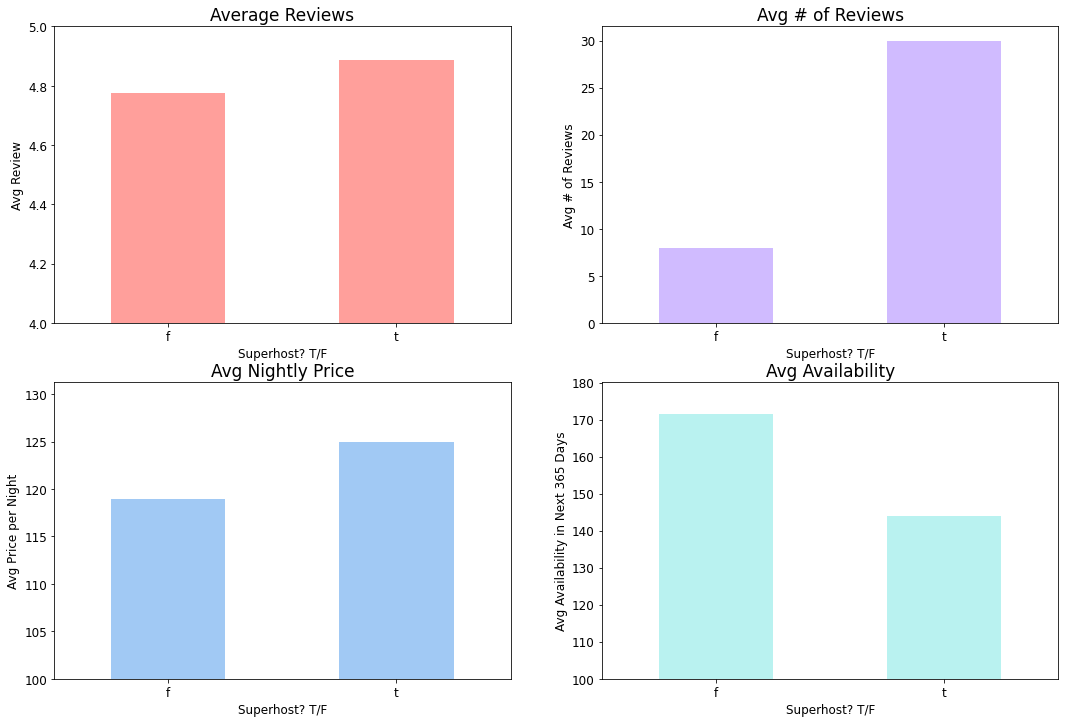

In [108]:
fig,axs = plt.subplots(2, 2)
df_superhost['avg_review'].plot.bar(ax=axs[0,0], linewidth=4, figsize = (18,12), color='r')
df_superhost['number_of_reviews'].plot.bar(ax=axs[0,1], linewidth=4, color='m')
df_superhost['price'].plot.bar(ax=axs[1,0], linewidth=4, color='b')
df_superhost['availability_365'].plot.bar(ax=axs[1,1], linewidth=4, color='c')

#set plot titles
axs[0,0].set_title('Average Reviews', size=17)
axs[0,1].set_title('Avg # of Reviews', size=17)
axs[1,0].set_title('Avg Nightly Price', size=17)               
axs[1,1].set_title('Avg Availability', size=17)

#set x-axs labels
axs[0,0].set_xlabel('Superhost? T/F',size=12)
axs[0,1].set_xlabel('Superhost? T/F',size=12)
axs[1,0].set_xlabel('Superhost? T/F',size=12)
axs[1,1].set_xlabel('Superhost? T/F',size=12)

#set y-axis labels
axs[0,0].set_ylabel('Avg Review',size=12)
axs[0,1].set_ylabel('Avg # of Reviews',size=12)
axs[1,0].set_ylabel('Avg Price per Night',size=12)
axs[1,1].set_ylabel('Avg Availability in Next 365 Days',size=12)

#rotate and resize tick labels for readability
axs[0,0].tick_params(labelrotation=0, labelsize=12)
axs[0,1].tick_params(labelrotation=0, labelsize=12)
axs[1,0].tick_params(labelrotation=0, labelsize=12)
axs[1,1].tick_params(labelrotation=0, labelsize=12)

#resize y-axes for better understanding of spread
axs[0,0].set_ylim(4,5)
axs[0,1].set_ylim(0)
axs[1,0].set_ylim(100)
axs[1,1].set_ylim(100)

Based on the above charts, we can see that, on average, superhosts receive more reviews and higher reviews, while also having a higher nightly price and lower availability in the next year. All these metrics indicate that superhosts provide better quality listings and experiences for their guests.

### Type of Room

Finally, we will look at the differences between the four types of rooms: entire home/apt, hotel room, private room, and shared room. This is interesting, since Airbnb is meant for ordinary homeowners to lease their properties, but with the addition of hotel rooms, we can compare different metrics like price and rating to see how the typical "homestay" Airbnb listing compares with hotel rooms. 

In [109]:
df_room = df.groupby('room_type').median()
df_room

,id,host_id,host_acceptance_rate,price,availability_365,number_of_reviews,avg_review,avg_review_quintile,exp_review2
room_type,,,,,,,,,
Entire home/apt,34315841.0,51051384.0,91.0,155.0,157.0,13.0,4.848571,2.0,2679.593958
Hotel room,34487734.0,260425153.0,98.0,209.0,305.5,10.5,4.604286,0.0,2069.250171
Private room,36103176.0,105395794.0,91.0,70.0,160.0,13.0,4.810000,2.0,2574.692583
Shared room,38649416.5,147306182.0,93.0,44.0,293.5,10.0,4.773571,1.0,2478.665959


(4.0, 5.0)

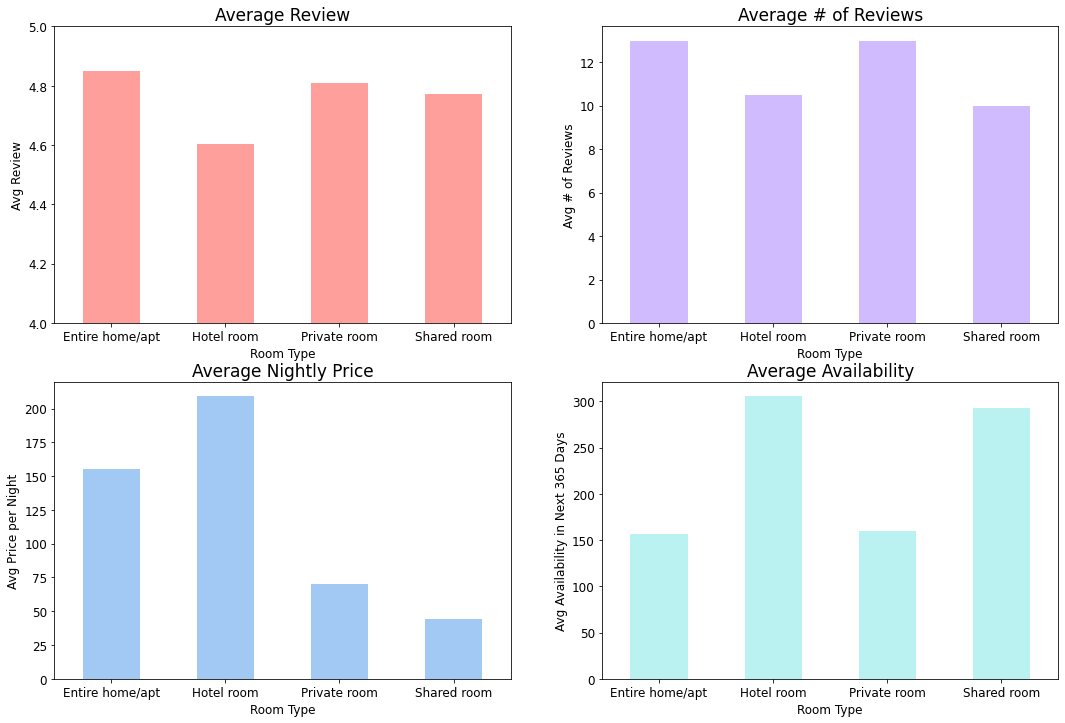

In [110]:
fig,axs = plt.subplots(2, 2)
df_room['avg_review'].plot.bar(ax=axs[0,0], linewidth=4, figsize = (18,12), color='r')
df_room['number_of_reviews'].plot.bar(ax=axs[0,1], linewidth=4, color='m')
df_room['price'].plot.bar(ax=axs[1,0], linewidth=4, color='b')
df_room['availability_365'].plot.bar(ax=axs[1,1], linewidth=4, color='c')

#set plot titles
axs[0,0].set_title('Average Review', size=17)
axs[0,1].set_title('Average # of Reviews', size=17)
axs[1,0].set_title('Average Nightly Price', size=17)               
axs[1,1].set_title('Average Availability', size=17)

#set x-axs labels
axs[0,0].set_xlabel('Room Type',size=12)
axs[0,1].set_xlabel('Room Type',size=12)
axs[1,0].set_xlabel('Room Type',size=12)
axs[1,1].set_xlabel('Room Type',size=12)

#set y-axis labels
axs[0,0].set_ylabel('Avg Review',size=12)
axs[0,1].set_ylabel('Avg # of Reviews',size=12)
axs[1,0].set_ylabel('Avg Price per Night',size=12)
axs[1,1].set_ylabel('Avg Availability in Next 365 Days',size=12)

#rotate and resize tick labels for readability
axs[0,0].tick_params(labelrotation=0, labelsize=12)
axs[0,1].tick_params(labelrotation=0, labelsize=12)
axs[1,0].tick_params(labelrotation=0, labelsize=12)
axs[1,1].tick_params(labelrotation=0, labelsize=12)

#resize y-axes for better understanding of spread
axs[0,0].set_ylim(4,5)

From these graphs, we can see that hotel rooms seem to be quite unpopular, with the highest availability in the next year while also having low reviews and high prices. This could mean that guests typically have better experiences with Airbnbs compared to hotel rooms, or that Airbnb rentals are simply better value since the average price of staying in an entire home or apartment is less than a single hotel room. On the other hand, shared rooms seem to have relatively low demand despite having the lowest average price, which could indicate guests' reluctance to share a space with someone else.

## Data Transformation

Text(0.5, 1.0, 'Average Reviews of Airbnb Listings')

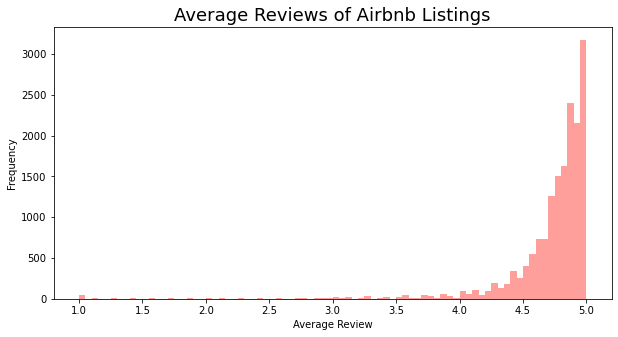

In [111]:
df['avg_review'].plot.hist(bins=80, color = 'r', figsize = (10, 5))
mpl.pyplot.xlabel('Average Review')
plt.title('Average Reviews of Airbnb Listings', size = 18)

The above histogram shows the strong skew in average ratings of Airbnbs. This tells us something about the behavior of Airbnb guests where they leave reviews mainly towards the 4 or 5 star level. However, if we look closely we see there is a slight uptick near the 1 star ratings which shows that people will generally leave a 1 star rating (and not a 2 or 2.5 star) rating when unsatisfied with their Airbnb.

Text(0.5, 1.0, 'Log of Average Reviews of Airbnb Listings')

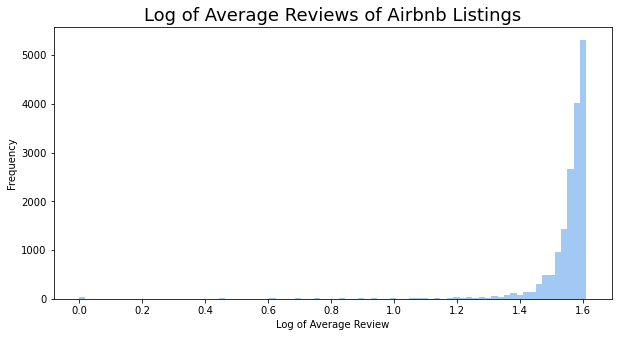

In [112]:
np.log(df['avg_review']).plot.hist(bins=80, color = 'b', figsize = (10, 5))
mpl.pyplot.xlabel('Log of Average Review')
plt.title('Log of Average Reviews of Airbnb Listings', size = 18)

The graph above shows a logarithmic transformation of the average reviews which is a commonly practiced data tranformation. However, as seen in the graph above it does not seem to help normalize the data as it is still skewed heavily towards the higher star ratings.

Text(0.5, 1.0, 'Inverse Log Reviews of Airbnb Listings')

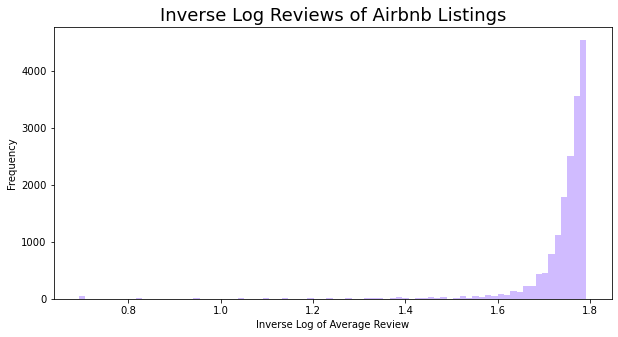

In [113]:
np.log1p(df['avg_review']).plot.hist(bins=80, color = 'm', figsize = (10, 5))
mpl.pyplot.xlabel('Inverse Log of Average Review')
plt.title('Inverse Log Reviews of Airbnb Listings', size = 18)

The graph above shows an inverse logarithmic transformation of the average reviews which is a commonly practiced data tranformation. However, as seen in the graph above it does not seem to help normalize the data as it is still skewed heavily towards the higher star ratings.

Text(0.5, 1.0, 'Average Reviews^5 of Airbnb Listings')

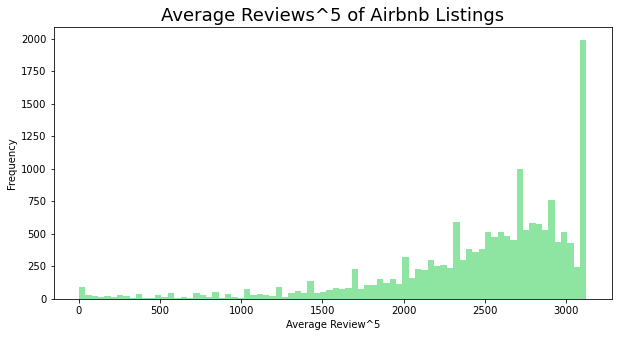

In [114]:
df['exp_review2'].plot.hist(bins=80, color = 'g', figsize = (10, 5))
mpl.pyplot.xlabel('Average Review^5')
plt.title('Average Reviews^5 of Airbnb Listings', size = 18)

Since the logarithmic and inverse logarithmic transformations did not help to normalize the data, the graph above shows an exponential transformation. This has clearly been the most effective data transformation to normalize the average review data. Although it is still heavily skewed towards the higher ratings it is still better normalized than either of the logarithmic transformations and that is why an exponential transformation is what is used in the rest of this project. 

## Regression Analysis

### Price v. Average Review

First, we are interested in the relationship between price and average review. Since most of the listings have average reviews that are concentrated between 4.5 and 5, we will instead perform the analysis using the average review to the power of 5 to exacerbate the differences between the ratings. 

Text(0.5, 1.0, 'Price v. Rating of Airbnb Listings')

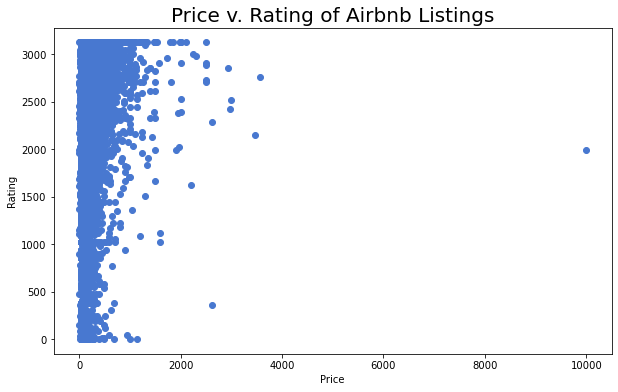

In [115]:
sns.set_color_codes("muted")
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['price'], y = df['exp_review2'], color ='b')
ax.set_xlabel('Price',size=10)
ax.set_ylabel('Rating',size=10)
plt.title('Price v. Rating of Airbnb Listings', size = 20)

As shown above, there is a clear outlier that prevents us from properly visualizing the relationship, so first we must remove outliers from this analysis

Text(0.5, 1.0, 'Price v. Rating of Airbnb Listings')

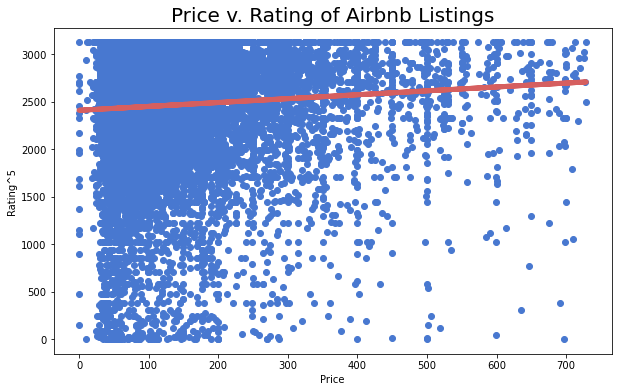

In [116]:
from scipy import stats 
df_1 = df[(np.abs(stats.zscore(df['price'])) < 3)]
reg =smf.ols(formula='exp_review2 ~ price', data=df_1).fit()
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_1['price'], y = df_1['exp_review2'], color = 'b')
df_1['yhat'] = reg.predict()
df_1.set_index('price')['yhat'].plot(color='r', linewidth=5,ax=ax)
ax.set_xlabel('Price',size=10)
ax.set_ylabel('Rating^5',size=10)
plt.title('Price v. Rating of Airbnb Listings', size = 20)

In [117]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            exp_review2   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     84.26
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           4.85e-20
Time:                        18:15:22   Log-Likelihood:            -1.2860e+05
No. Observations:               16417   AIC:                         2.572e+05
Df Residuals:                   16415   BIC:                         2.572e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2410.2155      8.087    298.018      0.000    2394.363    2426.068
price          0.4099      0.045      9.179      0.000       0.322       0.497
==============================================================================
Omnibus:                     4951.168   Durbin-Watson:                   1.879
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13564.190
Skew:                          -1.620   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                         307.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As shown above in the plot and regression output, there is a slight positive relationship between price and average review^5, indicating that more expensive listings may be of better quality and provide the guest with a better experience. 

### Number of Review v. Average Review

Next, we are interested in whether there is a relationship between rating and number of reviews. 

Text(0.5, 1.0, '# of Reviews v. Rating of Airbnb Listings')

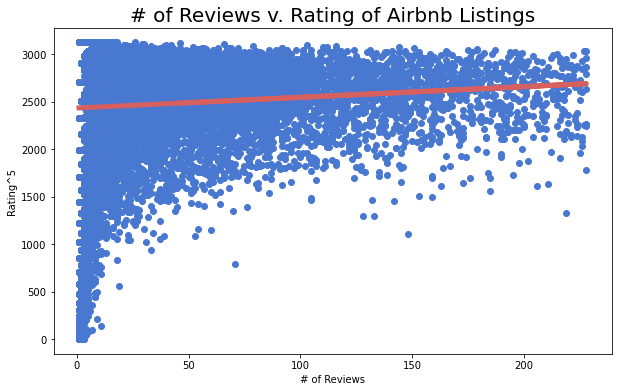

In [118]:
df_1 = df[(np.abs(stats.zscore(df['number_of_reviews'])) < 3)]
reg = smf.ols(formula='exp_review2 ~ number_of_reviews', data=df_1).fit()
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_1['number_of_reviews'], y = df_1['exp_review2'], color = 'b')
df_1['yhat'] = reg.predict()
df_1.set_index('number_of_reviews')['yhat'].plot(color='r', linewidth=5,ax=ax)
ax.set_xlabel('# of Reviews',size=10)
ax.set_ylabel('Rating^5',size=10)
plt.title('# of Reviews v. Rating of Airbnb Listings', size = 20)

In [119]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            exp_review2   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     109.8
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           1.33e-25
Time:                        18:15:22   Log-Likelihood:            -1.2756e+05
No. Observations:               16268   AIC:                         2.551e+05
Df Residuals:                   16266   BIC:                         2.551e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2434.5701      5.947    409.406      0.000    2422.914    2446.226
number_of_reviews     1.1243      0.107     10.477      0.000       0.914       1.335
==============================================================================
Omnibus:                     4489.849   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11290.037
Skew:                          -1.518   Prob(JB):                         0.00
Kurtosis:                       5.727   Cond. No.                         68.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, we see a slight positive relationship between a listing's number of reviews and its average rating. This could indicate that guests with more positive experiences are more inclined to leave reviews, or that the more popular listings actually provide better stays to their guests. 

### Exclusivity

An interesting feature of Airbnb is the ability for hosts to reject guests at their discretion. Does there exist a relationship between a host's acceptance rate and the listing's rating? 

Text(0.5, 1.0, 'Exclusivity v. Rating of Airbnb Listings')

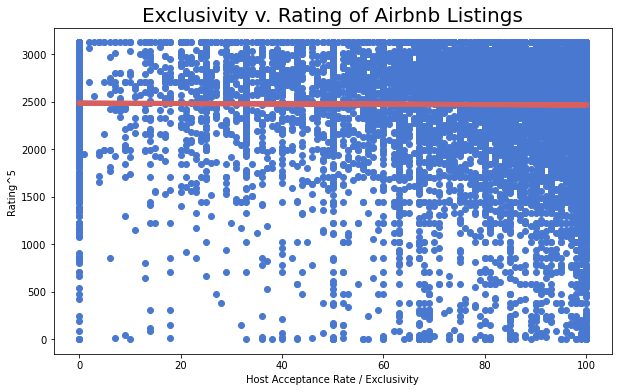

In [120]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['host_acceptance_rate'], y = df['exp_review2'], color='b')
reg =smf.ols(formula='exp_review2 ~ host_acceptance_rate', data=df_1).fit()
df_1['yhat'] = reg.predict()
df_1.set_index('host_acceptance_rate')['yhat'].plot(color='r', linewidth=5,ax=ax)
ax.set_xlabel('Host Acceptance Rate / Exclusivity',size=10)
ax.set_ylabel('Rating^5',size=10)
plt.title('Exclusivity v. Rating of Airbnb Listings', size = 20)

In [121]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            exp_review2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.218
Date:                Mon, 20 Dec 2021   Prob (F-statistic):              0.270
Time:                        18:15:22   Log-Likelihood:            -1.2761e+05
No. Observations:               16268   AIC:                         2.552e+05
Df Residuals:                   16266   BIC:                         2.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2485.8538     14.315    173.653      0.000    2457.795    2513.913
host_acceptance_rate    -0.1892      0.171     -1.104      0.270      -0.525       0.147
==============================================================================
Omnibus:                     4859.065   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13056.074
Skew:                          -1.614   Prob(JB):                         0.00
Kurtosis:                       5.973   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This time, we see a slight negative relationship between acceptance rate and average review, which could indicate that hosts who are more selective with their bookings are more likely to privide positive experiences for their guests. However, the p-value for this regression is 0.27, which means that this relationship is probably insignificant. 

### Popularity

Finally, we are curious about whether the most popular listings, or the listings with the least availability in the next year, could have the highest reviews. 

Text(0.5, 1.0, 'Popularity v. Rating of Airbnb Listings')

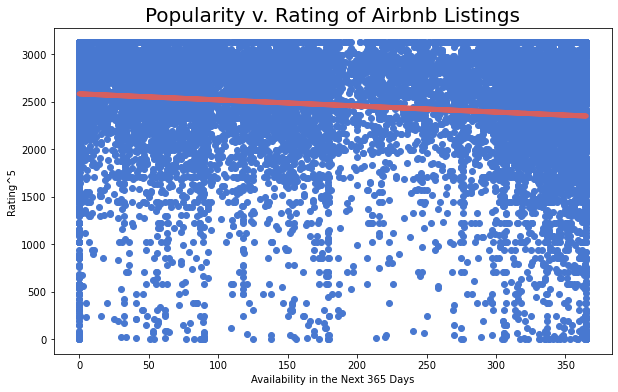

In [122]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['availability_365'], y = df['exp_review2'], color='b')
reg =smf.ols(formula='exp_review2 ~ availability_365', data=df_1).fit()
df_1['yhat'] = reg.predict()
df_1.set_index('availability_365')['yhat'].plot(color='r', linewidth=5,ax=ax)
ax.set_xlabel('Availability in the Next 365 Days',size=10)
ax.set_ylabel('Rating^5',size=10)
plt.title('Popularity v. Rating of Airbnb Listings', size = 20)

In [123]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            exp_review2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     316.1
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           4.63e-70
Time:                        18:15:22   Log-Likelihood:            -1.2746e+05
No. Observations:               16268   AIC:                         2.549e+05
Df Residuals:                   16266   BIC:                         2.549e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2583.8675      7.956    324.770      0.000    2568.273    2599.462
availability_365    -0.6406      0.036    -17.780      0.000      -0.711      -0.570
==============================================================================
Omnibus:                     4794.161   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12902.684
Skew:                          -1.590   Prob(JB):                         0.00
Kurtosis:                       5.987   Cond. No.                         366.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above graph and regression output demonstrate a stronger negative correlation between availability in the next year and average rating. This could indicate that the highest demanded listings are popular for a good reason. However, it's important to note a potential source of error in this analysis, which is that host can block out dates at their own discretion, perhaps for personal reasons or otherwise. 

## Machine Learning: What Influences Average Review?

In this section, we are using *discretization* in data where we convert a continuous data attribute (average review) into two finite variables: above or below average. This process helps us use machine learning methods that are better with dealing with discrete data. There is a significant disadvantage to this, however. Using a small number of subsets can lead to data and information loss, because there is variance within each category as well.

In [124]:
#convert boroughs to numerical to let machine learning proceed
boroughcondition = [   
    (df['borough'].str.contains('Manhattan')),
    (df['borough'].str.contains('Queens')),
    (df['borough'].str.contains('Staten Island')),
    (df['borough'].str.contains('Brooklyn')),
    (df['borough'].str.contains('Bronx')) ]
boroughID = [1, 2, 3, 4, 5]
df['BoroughID'] = np.select(boroughcondition, boroughID)

#convert the room type to numerical to let machine learning proceed
roomcondition = [   
    (df['room_type'].str.contains('Entire home/apt')),
    (df['room_type'].str.contains('Private room')),
    (df['room_type'].str.contains('Shared room')),
    (df['room_type'].str.contains('Hotel room'))]
roomID = [1, 2, 3, 4]
df['RoomID'] = np.select(roomcondition, roomID)

In [125]:
df['avg_review'].describe() #what is considered above and below average

count    16667.000000
mean         4.722207
std          0.412068
min          1.000000
25%          4.674286
50%          4.831429
75%          4.928571
max          5.000000
Name: avg_review, dtype: float64

In [126]:
abovebelowavg = [   
    (df['avg_review'] > 4.722707),
    (df['avg_review'] <= 4.722707)]
dummyvar = [1,0]
df['Above_Avg'] = np.select(abovebelowavg, dummyvar)

### 1. Nearest Neighbors Regression

In [127]:
from sklearn.neighbors import KNeighborsClassifier as knc
from sklearn.model_selection import train_test_split as tts
import sklearn.metrics as metrics

columns = ['price' , 'BoroughID' , 'RoomID']
X = df[columns]
Y = df.Above_Avg

X_train, X_test, Y_train, Y_test = tts(X,Y, test_size=0.5, random_state=0)
classifier = knc(n_neighbors=10)
classifier.fit(X_train, Y_train)
y_predict = classifier.predict(X_test)

print('Accuracy', metrics.accuracy_score(Y_test, y_predict)) 
print('Precision', metrics.precision_score(Y_test, y_predict))
print('Recall', metrics.recall_score(Y_test, y_predict))

Accuracy 0.6498680105591552
Precision 0.7133152173913043
Recall 0.8225974930362117


In [128]:
yprediction = pd.Series(y_predict)
print(yprediction.value_counts())

1    6624
0    1710
dtype: int64


Before we use the optimal number of neighbors, 6624 rentals are predicted to be above average

<AxesSubplot:>

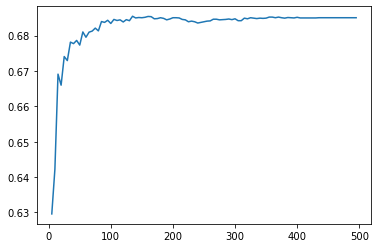

In [129]:
from sklearn.model_selection import cross_val_score as cvs
kvalue = pd.Series()
for i in range (5, 500, 5):
   kvalue.loc[i] = cvs(knc(n_neighbors=i), X,Y, cv=5).mean()
kvalue.plot() 

In [130]:
ideal_number = kvalue.idxmax()  
ideal_number

135

In [131]:
X_train, X_test, Y_train, Y_test = tts(X,Y, test_size=0.5, random_state=0)
classifier = knc(n_neighbors=ideal_number)
classifier.fit(X_train, Y_train)
y_predict2 = classifier.predict(X_test)

print('Accuracy', metrics.accuracy_score(Y_test, y_predict2)) 
print('Precision', metrics.precision_score(Y_test, y_predict2)) 
print('Recall', metrics.recall_score(Y_test, y_predict2))

Accuracy 0.6889848812095032
Precision 0.690522243713733
Recall 0.9944289693593314


It seems that, while we have gained accuracy, we have lost precision but have also increased recall.

In [132]:
yprediction = pd.Series(y_predict2)
print(yprediction.value_counts())

1    8272
0      62
dtype: int64


Under the modified model that uses the ideal number of neighbors, 8272 are predicted to be above average, and 62 are predicted to below

### 2. Random Forest Regression

In [133]:
from sklearn.ensemble import RandomForestClassifier as randfor
X_train, X_test, Y_train, Y_test = tts(X,Y, test_size=0.5, random_state=0)

columns = ['price' , 'BoroughID' , 'RoomID']
X = df[columns]
Y = df.Above_Avg

classifier = randfor(n_estimators=100, max_depth=5)
classifier.fit(X_train, Y_train)
y_predict = classifier.predict(X_test)

print('Accuracy', metrics.accuracy_score(Y_test, y_predict))
print('Precision', metrics.precision_score(Y_test, y_predict)) 
print('Recall', metrics.recall_score(Y_test, y_predict))

Accuracy 0.6943844492440605
Precision 0.6964966195451752
Recall 0.9864206128133705


In [134]:
yprediction = pd.Series(y_predict)
print(yprediction.value_counts())

1    8135
0     199
dtype: int64


Before we use the ideal max depth, we are predicted to have 8118 above average listings

In [135]:
rf = pd.Series()
for i in range(1,20):
    rf.loc[i] = cvs(randfor(n_estimators=100,max_depth=i),X,Y,cv=5).mean()

In [136]:
rf.idxmax()

4

In [137]:
columns = ['price' , 'BoroughID' , 'RoomID']
X = df[columns]
Y = df.Above_Avg

classifier = randfor(n_estimators=100, max_depth=6)
classifier.fit(X_train, Y_train)
y_predict = classifier.predict(X_test)

print('Accuracy', metrics.accuracy_score(Y_test, y_predict))
print('Precision', metrics.precision_score(Y_test, y_predict)) 
print('Recall', metrics.recall_score(Y_test, y_predict))

Accuracy 0.6937844972402207
Precision 0.6967940813810111
Recall 0.9838091922005571


Very slightly higher Accuracy and Precision, but lower recall.

In [138]:
yprediction = pd.Series(y_predict)
print(yprediction.value_counts())

1    8110
0     224
dtype: int64


More listings are predicted to be below average

### 3. Decision Tree Analysis

In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import tree

In [140]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 123)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [141]:
classifier = DecisionTreeClassifier(max_leaf_nodes=8,random_state=0)
classifier.fit(X_train,y_train)
y_predicted = classifier.predict(X_test)
print(accuracy_score(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

0.68969278313034
[[  19 1697]
 [  10 3775]]


In [142]:
importance = classifier.feature_importances_
importance

array([0.49750318, 0.34720186, 0.15529496])

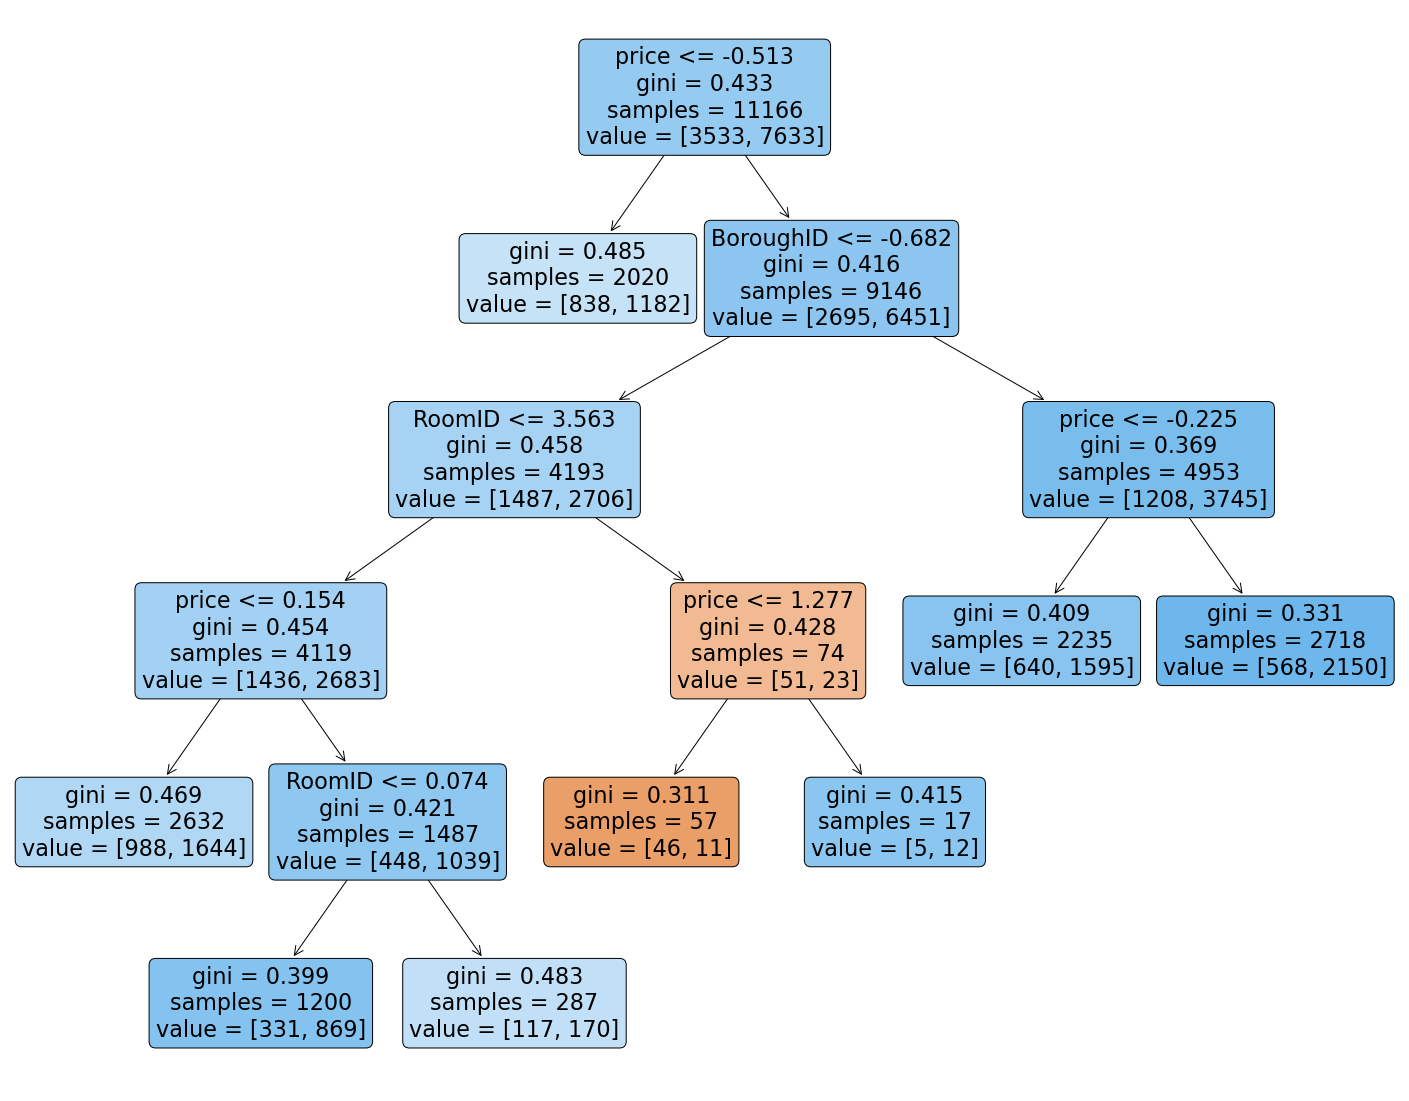

In [143]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier,feature_names= X.columns,
                   filled=True,rounded  = True)

# Visualizations

Text(0.5, 1.0, 'Airbnb Listings by Geographical Coordinates')

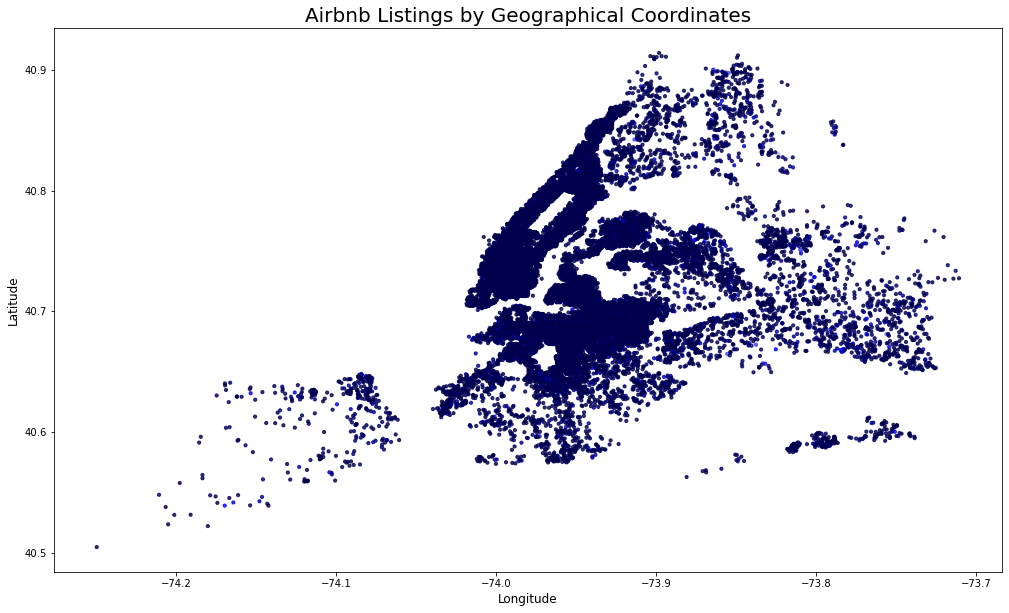

In [152]:
#paint a picture of NYC using longitutude and latitude. What neighborhoods have the highest number of reviews?
#Aka, which ones are the most popular??
cmap = plt.cm.seismic
n = mpl.colors.Normalize()

fig,ax = plt.subplots()
df_raw.plot.scatter(ax=ax,x='longitude',y='latitude',alpha=.8,s=10,figsize=(17,10),color=cmap(n(df_raw['number_of_reviews'])))
plt.ylabel('Latitude',fontsize=12)
plt.xlabel('Longitude',fontsize=12)
plt.title('Airbnb Listings by Geographical Coordinates', fontsize=20)


The shape does look like New York, so this was achieved, however the color differentiation is not easy to understand. This is likely due to the sheer amount of listings that there are. One listing is very unlikely to be significantly more popular than another. However, it is more likely that certain neighborhoods are more popular than others. In order to make the differentiation more obvious, lets group by neighborhood. Hopefully we can make this graph more intuitive?

In [153]:
df_rawmod = df_raw.groupby('neighbourhood_cleansed').agg(
    {'id':'count','number_of_reviews':'mean','latitude':'median','longitude':'median'})
df_rawmod.sort_values('number_of_reviews', ascending= False)

,id,number_of_reviews,latitude,longitude
neighbourhood_cleansed,,,,
Castle Hill,1,157.000000,40.820920,-73.851380
Huguenot,3,151.000000,40.541200,-74.169830
Silver Lake,3,99.333333,40.622870,-74.099680
Mount Eden,5,95.600000,40.842400,-73.917150
Woodlawn,6,81.833333,40.898780,-73.864715
...,...,...,...,...
Sea Gate,15,1.933333,40.577650,-74.010220
West Farms,6,1.333333,40.842990,-73.881965
Country Club,1,1.000000,40.848080,-73.820820


Based on what we see here, the most popular neighborhoods are castle hill, huguenot, silver lake, mount eden, and woodlawn. Can we indicate where these neighborhoods are on the map?

In [154]:
cmap = plt.cm.RdYlGn
n = mpl.colors.Normalize()

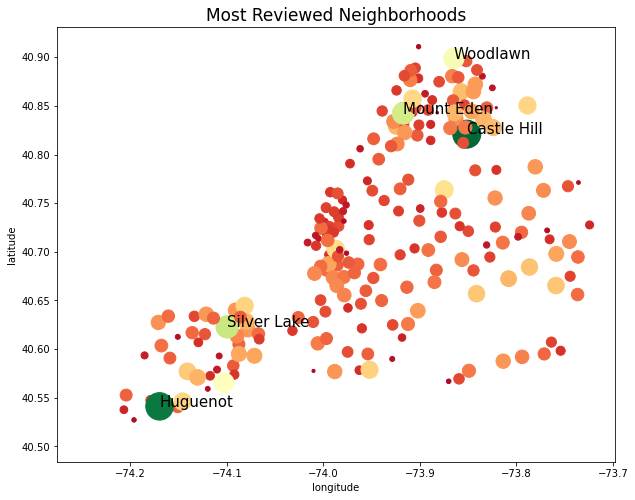

In [155]:
fig,ax = plt.subplots()
df_rawmod.plot.scatter(ax=ax,x='longitude',y='latitude',alpha=1,
               s=(df_rawmod['number_of_reviews']**1)*5,figsize=(10,8),color=cmap(n(df_rawmod['number_of_reviews'])))
ax.set_title('Most Reviewed Neighborhoods', size=17)
top = df_rawmod.sort_values('number_of_reviews',ascending=False).head(5)
for i in top.index:
    ax.annotate(i,(top.loc[i,'longitude'],top.loc[i,'latitude']),size=15)

Now we can very clearly see where the most popular neighborhoods by number of reivews. However, when grouping by neighbhorhood, we have some very clear information loss. Since we have aggregated by number of reviews, we have less data, and therefore, a much less clear image of New York. But the difference are very very clear.